## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time: Part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


**Business Understanding:**

 King County, located in Washington DC, faces significant housing challenges due to its rapidly increasing population. The area is characterized by diverse neighborhoods, varying property values, and fluctuating market dynamics. Real estate is a crucial sector in King County, influencing both economic growth and community development. Key stakeholders include real estate agents, property owners, homebuyers, investors, regulatory bodies, and the local community. Understanding the intricacies of the housing market, including factors affecting property prices, buyer preferences, and market trends, is essential for making informed decisions and strategies in the real estate sector of King County

**Business Problem:**
One of the primary challenges facing stakeholders in King County's real estate market is accurately predicting house prices. The dynamic nature of the housing market, coupled with factors such as population growth, economic fluctuations, and changing buyer preferences, makes it difficult to determine optimal pricing strategies for properties. Real estate agents and homeowners often struggle to set competitive prices that reflect the true value of their properties and meet market demand. Without accurate price predictions, stakeholders may encounter difficulties in selling properties efficiently, maximizing returns on investments, and maintaining competitiveness in the market. Addressing this business problem requires developing robust predictive models and leveraging data-driven insights to guide pricing decisions effectively in King County's real estate market.

Stakeholders: Real estate agents, Property owners, Homebuyers, Investors and Regulatory bodies

**Research Questions**
* What are the key factors influencing house prices in King County, Washington DC? 
* How do factors such as the number of bedrooms, bathrooms, and overall grade of the property influence house prices in King County? 
* How do house sizes and lot sizes in the neighbouring areas affect house prices?


In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Loading data
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# Checking the shape of the dataset
df.shape


(21597, 21)

In [4]:
# Checking available columns in the dataset 
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Checking the structure of the dataset(missingness & datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Identifying  Missing Data

In [6]:
# Identifying missingness
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# Handling missingness
df.isnull().mean()

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

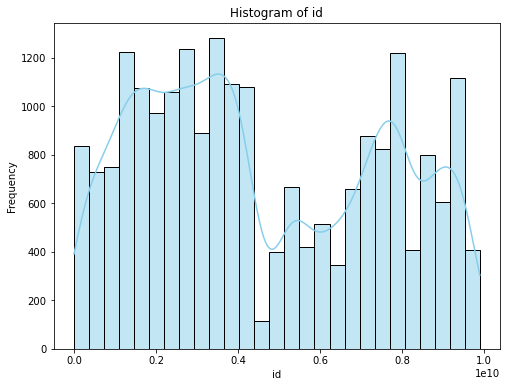

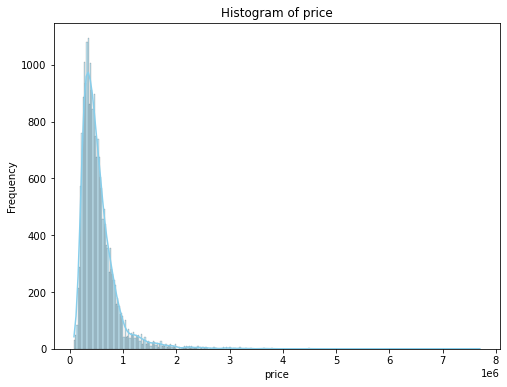

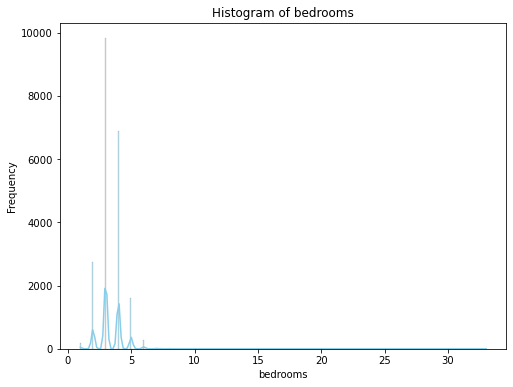

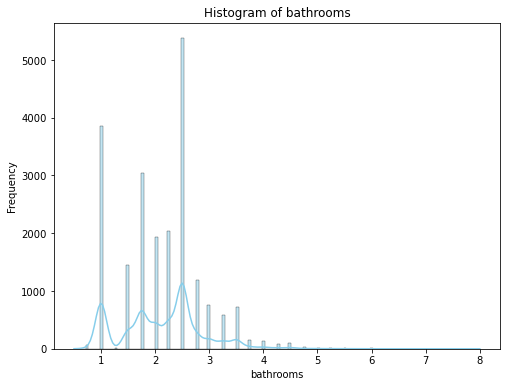

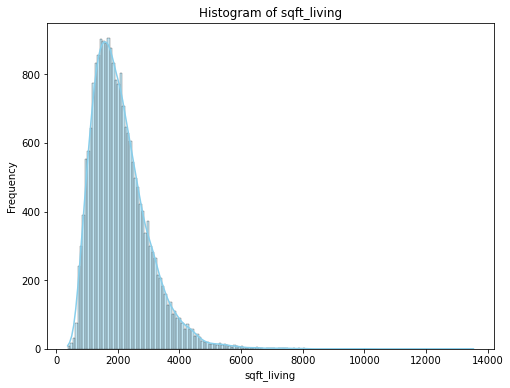

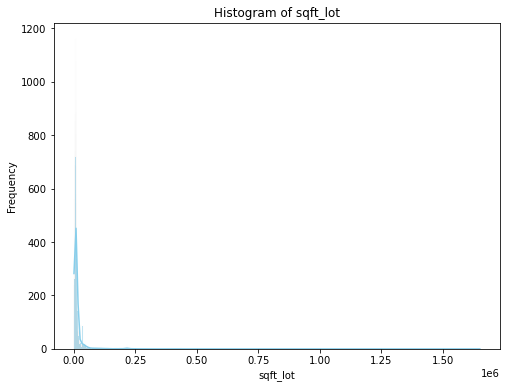

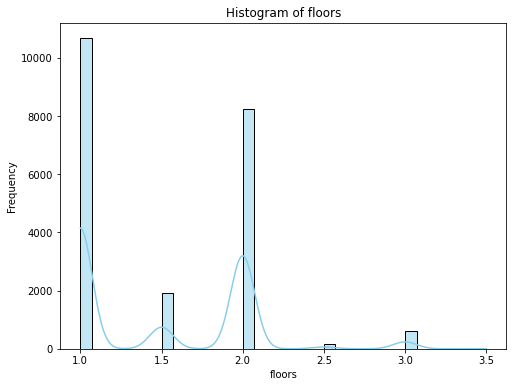

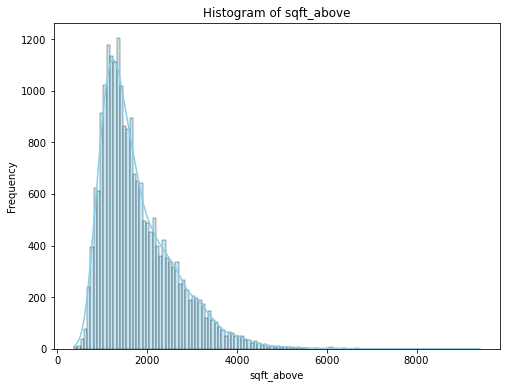

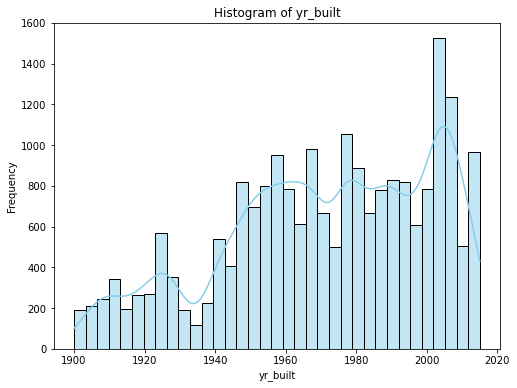

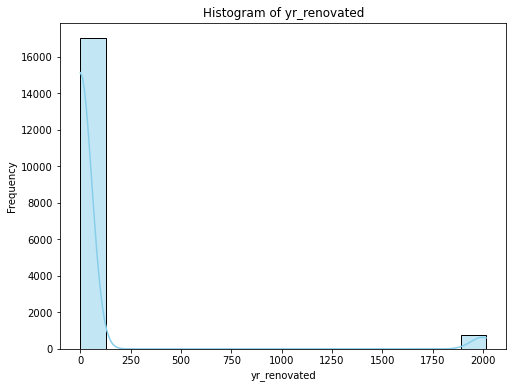

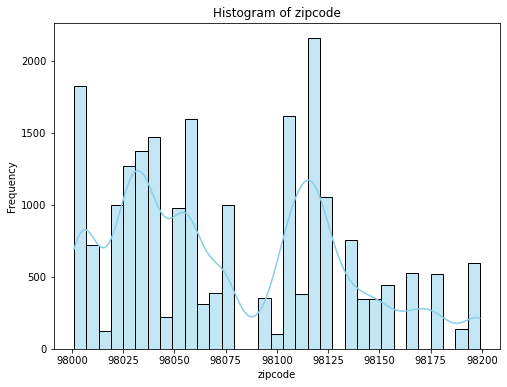

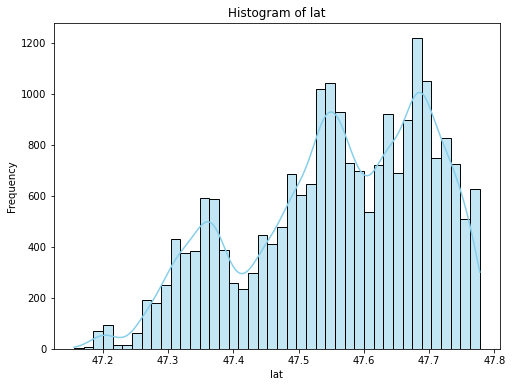

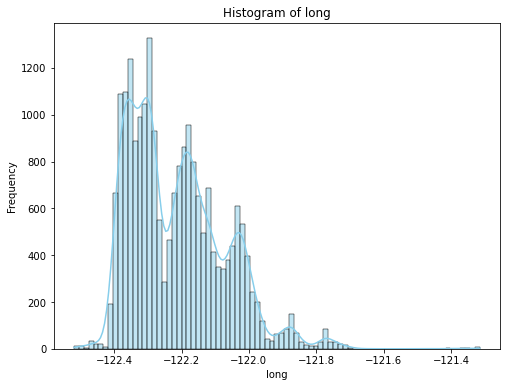

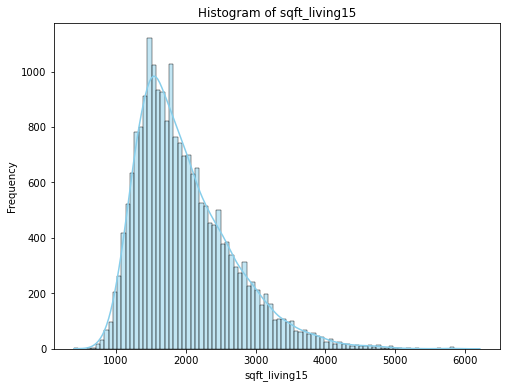

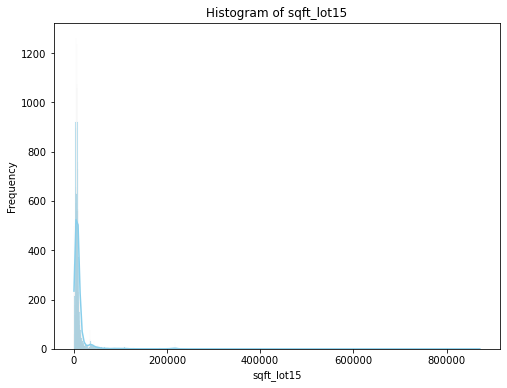

In [8]:
# Visualizing the distribution of the dataset to check for skewness that will guide in handling missingness
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Handling missing data

In [9]:
# Imputing waterfront column with mode
mode_waterfront = df['waterfront'].mode()[0]
df['waterfront'].fillna(mode_waterfront, inplace=True)

In [10]:
# Dropping rows with missing 'View' values 
df.dropna(subset=['view'], inplace=True)

In [11]:
# Imputing rows with missing 'yr_renovated' values 
median_year = df['yr_renovated']. median()

df['yr_renovated'].fillna(median_year, inplace=True)
# If your data is normally distributed and does not have outliers affecting the mean significantly, imputing with the mean might be appropriate.
# If your data is skewed or has outliers, imputing with the median might be more robust as it is less sensitive to outliers.

Identyfing & Handling Duplicates

In [12]:
df.duplicated().sum()

0

Identifying  Outliers

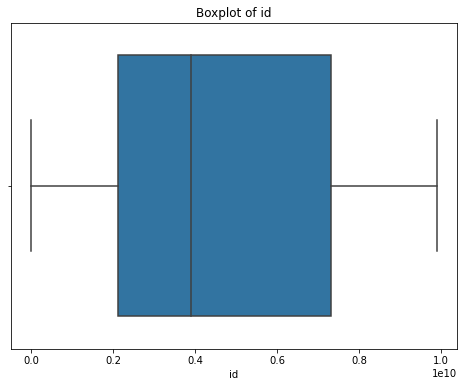

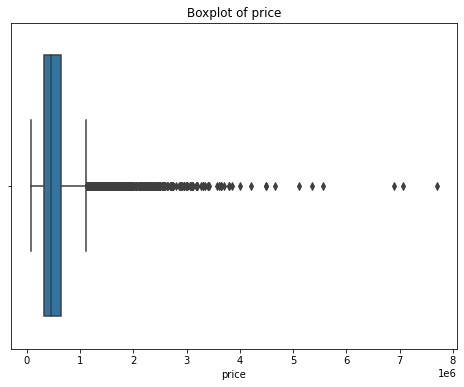

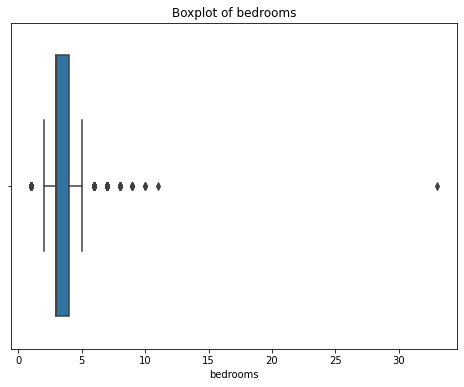

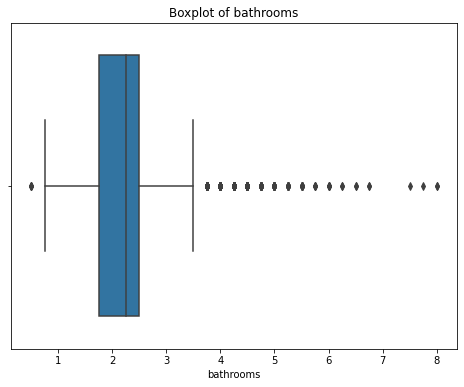

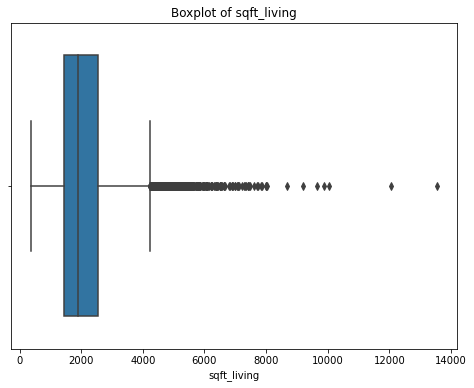

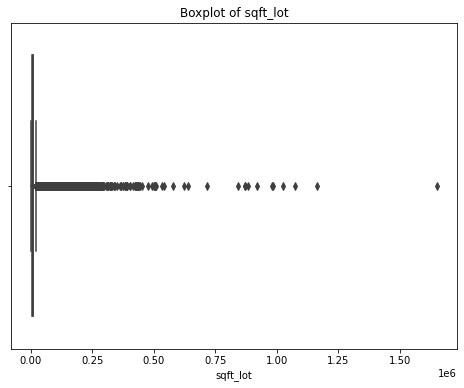

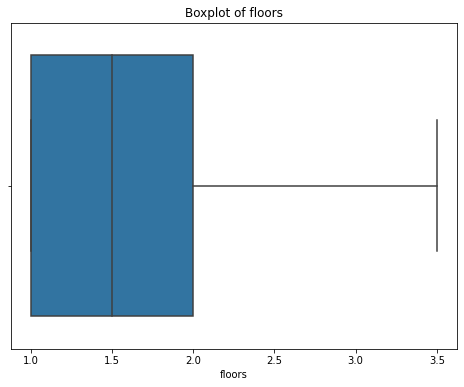

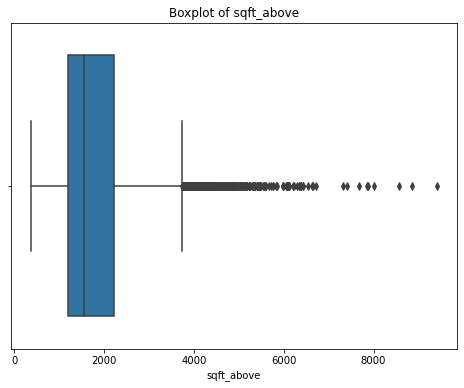

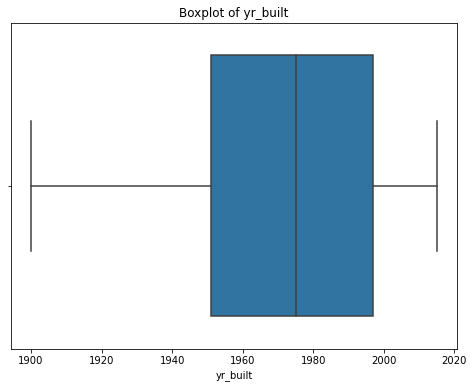

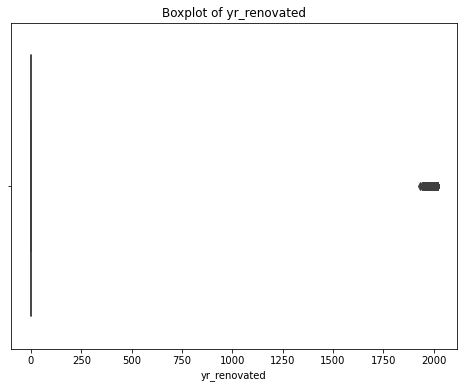

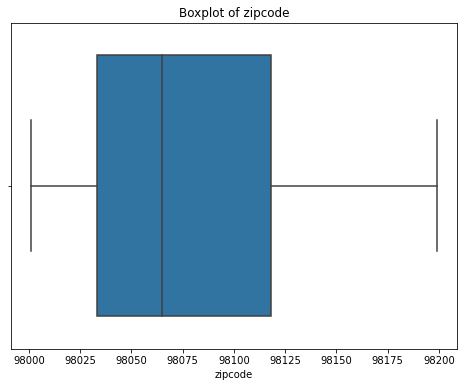

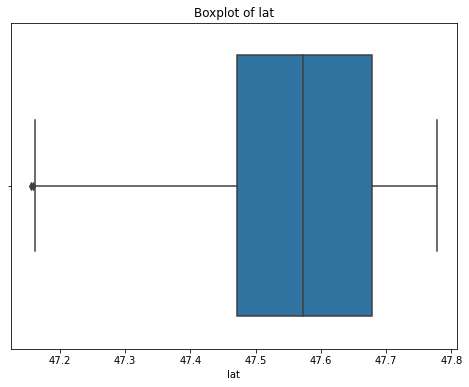

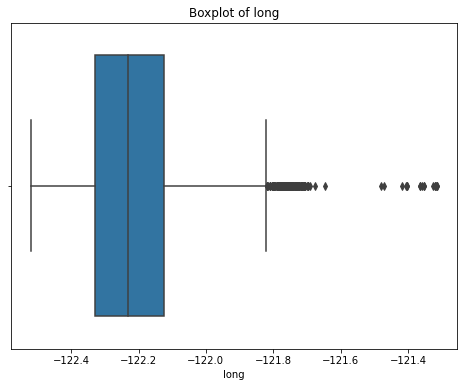

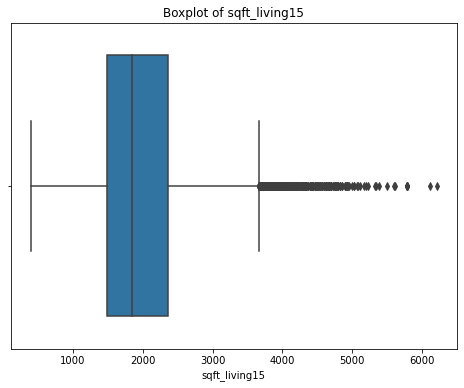

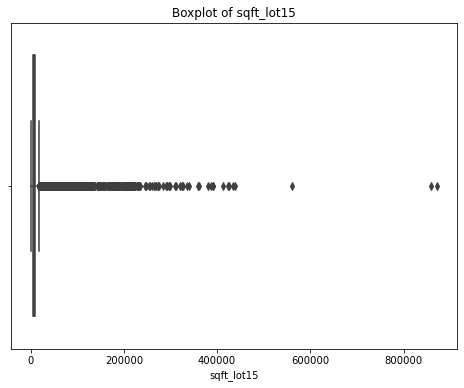

In [13]:
# Visualizing data to check for outliers
sns.boxplot
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,1788.557537,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,827.745641,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



We identified outliers in the following columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
           'floors', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']. 
 We deployed the use of InterQuartile Range to handle the outliers



Handling Outliers

In [15]:
# Assuming df is your DataFrame containing the columns mentioned
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
           'floors', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

# Calculate the quartiles
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
# Remove outliers
df_filtered = df[~outliers]

# Display the filtered DataFrame
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)



Original DataFrame shape: (21534, 21)
Filtered DataFrame shape: (16856, 21)


In [16]:
df_filtered.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.685600e+04,1.685600e+04,16856.000000,16856.000000,16856.000000,16856.000000,16856.000000,16856.000000,16856.000000,16856.0,16856.000000,16856.000000,16856.000000,16856.000000,16856.000000
mean,4.765645e+09,4.577007e+05,3.281561,1.998665,1874.119245,7156.290045,1.472087,1622.111711,1971.214404,0.0,98080.738016,47.559046,-122.226703,1847.119364,7023.878856
std,2.869689e+09,1.962153e+05,0.783761,0.658703,671.830180,3437.874533,0.545613,641.493761,29.374200,0.0,53.960780,0.139155,0.132692,548.657983,3059.723496
min,2.800031e+06,7.800000e+04,2.000000,0.750000,540.000000,520.000000,1.000000,480.000000,1900.000000,0.0,98001.000000,47.155900,-122.503000,620.000000,651.000000
25%,2.326075e+09,3.054988e+05,3.000000,1.500000,1370.000000,4800.000000,1.000000,1150.000000,1952.000000,0.0,98033.000000,47.468500,-122.335000,1440.000000,4923.000000
50%,4.077800e+09,4.200000e+05,3.000000,2.000000,1780.000000,7155.000000,1.000000,1460.000000,1974.000000,0.0,98074.000000,47.568550,-122.262000,1740.000000,7200.000000
75%,7.518503e+09,5.750000e+05,4.000000,2.500000,2300.000000,9138.250000,2.000000,1960.250000,1998.000000,0.0,98118.000000,47.680700,-122.149000,2180.000000,8839.000000
max,9.900000e+09,1.120000e+06,5.000000,3.500000,4230.000000,19141.000000,3.500000,4190.000000,2015.000000,0.0,98199.000000,47.777600,-121.319000,3660.000000,17550.000000


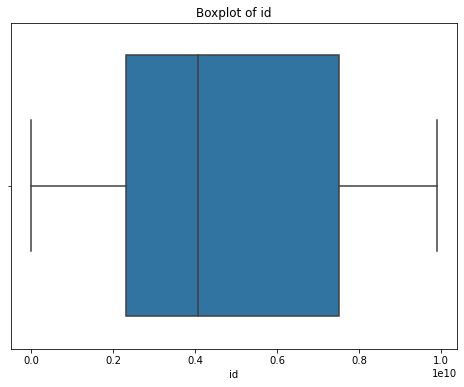

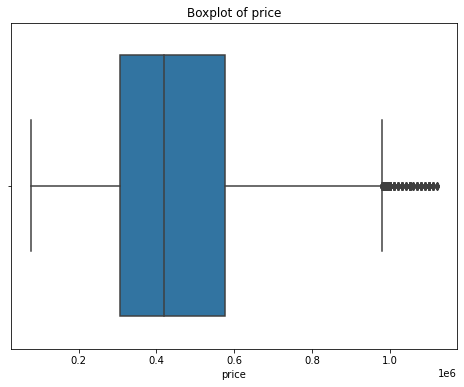

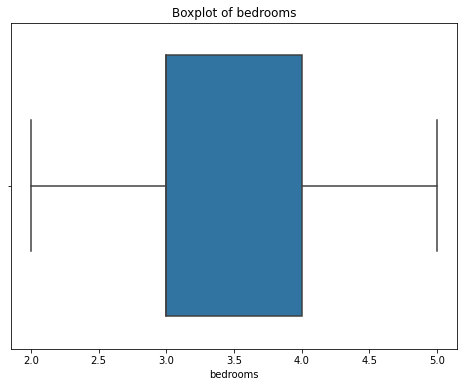

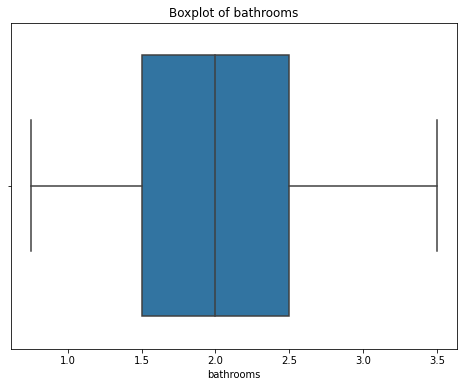

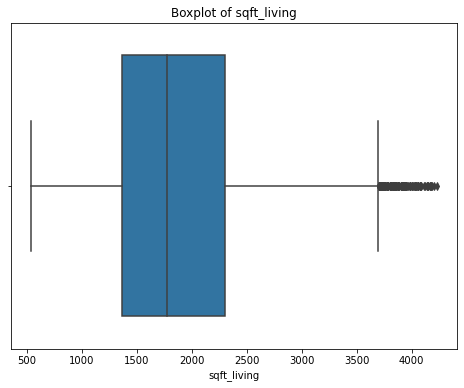

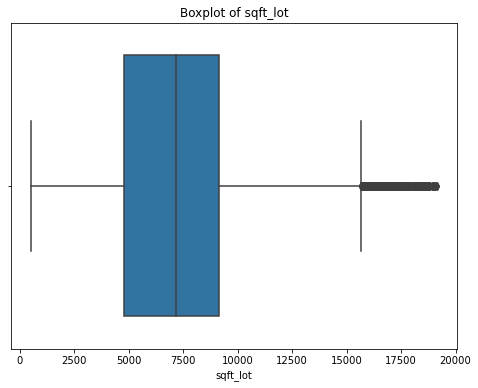

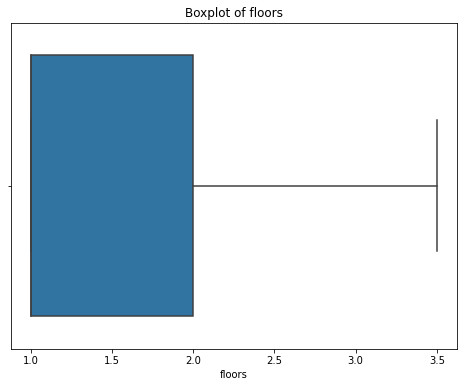

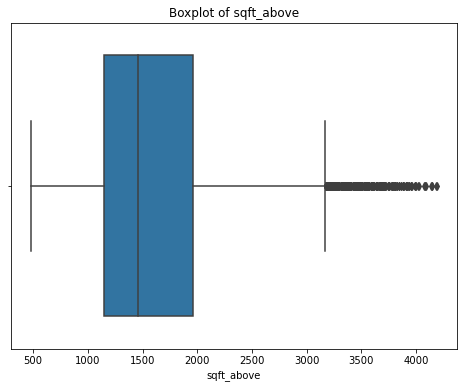

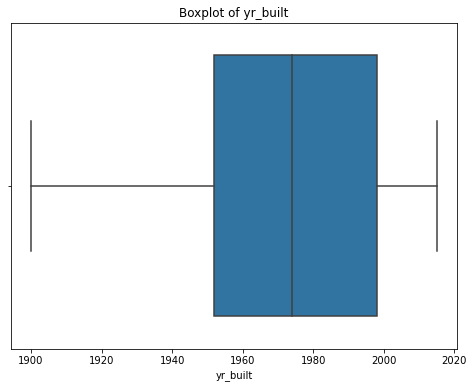

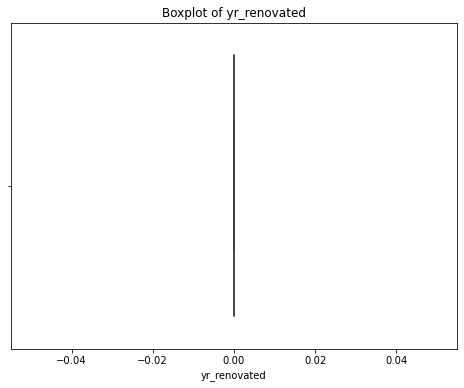

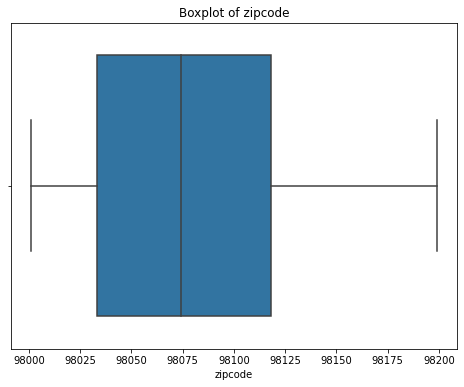

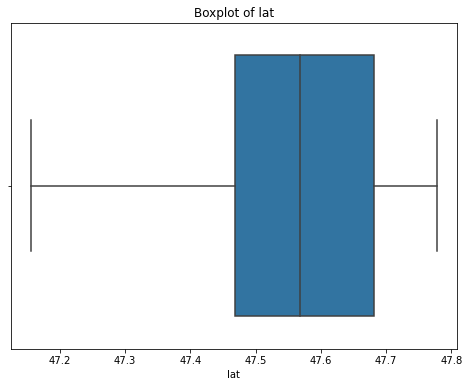

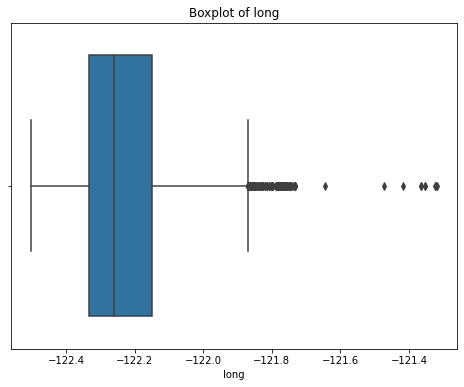

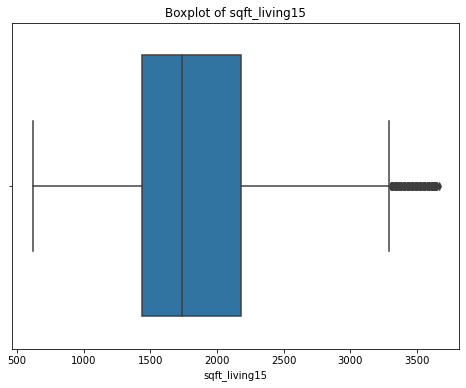

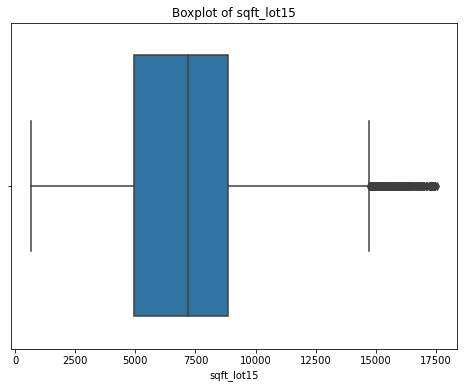

In [17]:
# Visualizing data after handling outliers

sns.boxplot
numerical_cols = df_filtered.select_dtypes(include=['float64', 'int64'])
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_filtered[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [63]:
#Changing data types

#df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y')
#df_filtered['yr_renovated'] = pd.to_datetime(df_filtered['yr_renovated'], format='%Y')
# df_filtered['yr_built'] = pd.to_datetime(df_filtered['yr_built'], format='%Y')


In [ ]:
df_filtered.info()

In [41]:
# Exporting the cleaned dataset
df_filtered.to_csv('cleaned_dataset.csv', index=False)

In [42]:
df_filtered.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [43]:
df = pd.read_csv('cleaned_dataset.csv')

df.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5142,2725069150,8/17/2014,710000.0,3,2.5,2830,9680,2.0,NO,NONE,...,10 Very Good,2830,0.0,1991,0.0,98074,47.6249,-122.024,2970,8691
9139,2112700370,8/13/2014,199400.0,2,1.0,880,4000,1.0,NO,NONE,...,6 Low Average,880,0.0,1916,0.0,98106,47.5331,-122.352,1430,4000


In [44]:
df.shape

(16856, 21)

In [54]:
# Dropping the date  and id Columns

In [55]:
#df.drop('id', axis = 1, inplace = True)
#df.drop('date', axis = 1, inplace = True)
#df.drop('yr_renovated', axis = 1 , inplace = True)
#df.drop('zipcode', axis = 1 , inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,47.5112,-122.257,1340,5650
1,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,47.7379,-122.233,2720,8062
2,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,47.5208,-122.393,1360,5000
3,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,47.6168,-122.045,1800,7503
4,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,?,1995,47.3097,-122.327,2238,6819


***Checking for Correlations**

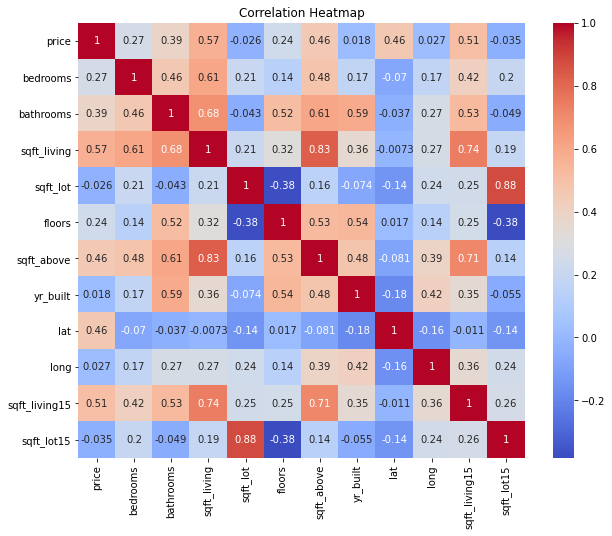

In [57]:
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

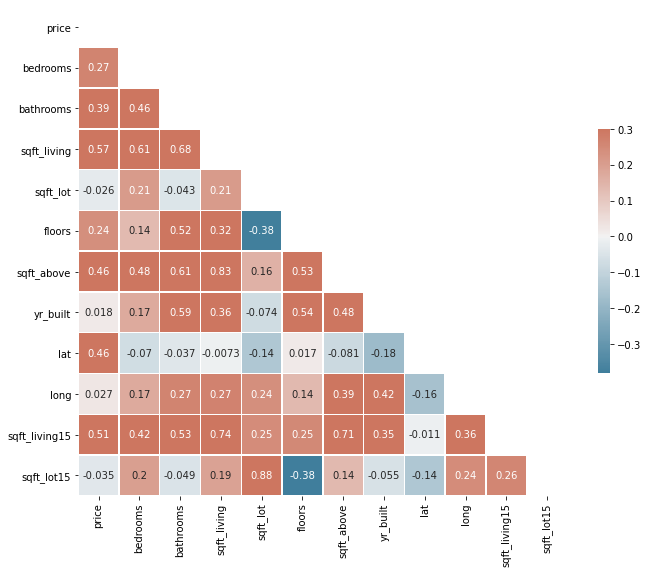

In [62]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True , linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [61]:
#y = price
#X = 'bedrooms', 'bathrooms', 'sqft_living' , 'sqft_above' , 'yr_built', 'floors', 'sqft_living15'
# Statistical analysis-EDA,
# Feature engineering
# Normalize
# Visualize
# Modelling